Daniel Kadyrov

Stevens ID: 10455680

CS557 - Natural Language Processing

Group 32 - Daniel Kadyrov

# Part 1

To get an idea about how difficult it is to unambiguously identify parts-of-speech select several words
that can be a noun, verb, adjective, and adverb (see here (Links to an external site.) for instances),
find their high frequency senses using WordNet,
examine their definitions and example uses, and
try to generate some rules for how to determine as to when they are a noun, verb, adjective, or adverb from their context.

In [2]:
words = ["back", "best", "better", "bitter", "broadside", "clean", "clear", "close", "cod", "collect", "counter", "crisscross", "damn", "double", "down", "even", "express", "fair", "fast", "fine", "firm", "flush", "forward", "free", "full", "home", "jolly", "last", "light", "low", "o.k", "okay", "out", "pat", "plain", "plumb", "plump", "pop", "prompt", "quiet", "right", "rough", "round", "second", "short", "solo", "square", "steady", "still", "tiptoe", "true", "upstage", "well", "wholesale", "worst", "wrong", "zigzag"]

## Plump

In [27]:

from nltk.corpus import wordnet

syns = wordnet.synsets("plump")

for syn in syns: 
    print(syn.pos())
    print(syn.definition())
    print(syn.lemma_names())
    print(syn.entailments())
    print(syn.hyponyms())
    print(syn.part_holonyms())
    print(syn.part_meronyms())
    # print(syn.frame_strings())
    print("----")

n
the sound of a sudden heavy fall
['plump']
[]
[]
[]
[]
----
v
drop sharply
['plummet', 'plump']
[]
[]
[]
[]
----
v
set (something or oneself) down with or as if with a noise
['plank', 'flump', 'plonk', 'plop', 'plunk', 'plump_down', 'plunk_down', 'plump']
[]
[]
[]
[]
----
v
make fat or plump
['fatten', 'fat', 'flesh_out', 'fill_out', 'plump', 'plump_out', 'fatten_out', 'fatten_up']
[Synset('feed.v.02')]
[]
[]
[]
----
v
give support (to) or make a choice (of) one out of a group or number
['plump', 'go']
[]
[]
[]
[]
----
s
sufficiently fat so as to have a pleasing fullness of figure
['chubby', 'embonpoint', 'plump']
[]
[]
[]
[]
----
r
straight down especially heavily or abruptly
['plump']
[]
[]
[]
[]
----


In [42]:
from nltk.tokenize import word_tokenize

def pos(word, sentence):
    sentence = word_tokenize(sentence)
    try: 
        index = sentence.index(word)
    except: 
        return "Word not in sentence"
    
    syns = wordnet.synsets(word)

    part = syns[0].pos()

    if index == 0: 
        part = "n"
    elif sentence[index-1] == "to":
        part = "v"
    elif "ing" in word:
        part = "v" 
    elif sentence[index-1] == "a" or sentence[index-1] == "the" or sentence[index-1] == "an": 
        try: 
            if wordnet.synsets(sentence[index+1])[0].pos() == 'n': 
                part = "s" 
            else: 
                part = "n"
        except:
            pass 
    return part 

sentence1 = "The berries were plump and sweet"
sentence2 = "He fell with a plump"
sentence3 = "She was a plump girl"

print(pos("plump", sentence1))
print(pos("plump", sentence2))
print(pos("plump", sentence3))

n
n
s


# Part 2 

See J&M 3rd Exercise 11.1 (12.1 in 2nd). Parsing with the CKY algorithm in Python is frequently used. Several Python versions are available: Simple Python statistical (CKY) parser (Links to an external site.) not explicitly mentioned in BKL, Stensaethf/CKY-Parser at https://github.com/stensaethf/CKY-Parser (Links to an external site.), with a built-in almost CNF converter, and a more capable one with epsilon productions handling at https://github.com/RobMcH/CYK-Parser (Links to an external site.). Apply them to “Book the cooks who cook the books.” and the longest sentences from Assignment 2. Compare the results to the results from previous assignments. If they do not already show important intermediate results edit them so they do.

## Exercise 11.1 

Draw tree structures for the following ATIS phrases:

a. Dallas

b. from Denver

c. after five p.m.

d. arriving in Washington

e. early flights

f. all redeye flights

g. on Thursday

h. a one-way fare

i. any delays in Denver


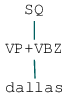

In [15]:
from stat_parser import Parser

parser = Parser()

parser.parse("Dallas")


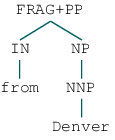

In [16]:
parser.parse("from Denver")

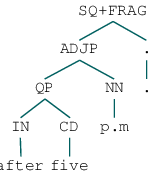

In [17]:
parser.parse("after five p.m.")

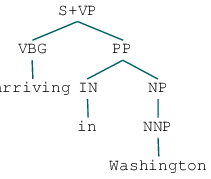

In [19]:
parser.parse("arriving in Washington")


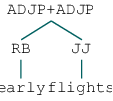

In [21]:
parser.parse("early flights")


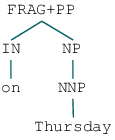

In [22]:
parser.parse("on Thursday")


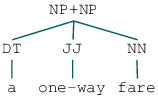

In [23]:
parser.parse("a one-way fare")

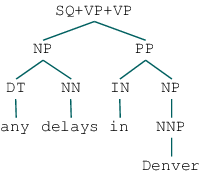

In [24]:
parser.parse("any delays in Denver")

## Longest Sentence

In [3]:
# From Assignment 2 
from nltk.corpus import inaugural
from nltk.tokenize import sent_tokenize, word_tokenize

sents = sent_tokenize(inaugural.raw())
max_sent = max(sents, key=len)
max_sent_toke = word_tokenize(max_sent)

max_sent

'On this subject it might become me better to be silent or to speak with diffidence; but as something may be expected, the occasion, I hope, will be admitted as an apology if I venture to say that if a preference, upon principle, of a free republican government, formed upon long and serious reflection, after a diligent and impartial inquiry after truth; if an attachment to the Constitution of the United States, and a conscientious determination to support it until it shall be altered by the judgments and wishes of the people, expressed in the mode prescribed in it; if a respectful attention to the constitutions of the individual States and a constant caution and delicacy toward the State governments; if an equal and impartial regard to the rights, interest, honor, and happiness of all the States in the Union, without preference or regard to a northern or southern, an eastern or western, position, their various political opinions on unessential points or their personal attachments; if a

In [8]:
print(parser.parse(max_sent_toke))

["ADP", "On"]
["NP+DET", "this"]
["ADJ", "subject"]
["NP+PRON", "it"]
["VERB", "might"]
["VERB", "become"]
["NP+PRON", "me"]
["ADJP+ADV", "better"]
["X+PRT", "to"]
["VERB", "be"]
["NP+INTJ+X", "silent"]
["CONJ", "or"]
["X+PRT", "to"]
["NP+INTJ+X", "speak"]
["ADP", "with"]
["NP+INTJ+X", "diffidence"]
[".", ";"]
["CONJ", "but"]
["ADP", "as"]
["NP+NOUN", "something"]
["NP+VERB", "may"]
["VERB", "be"]
["VERB", "expected"]
[".", ","]
["X+DET", "the"]
["NP+INTJ+X", "occasion"]
[".", ","]
["NP+PRON", "I"]
["NP+INTJ+X", "hope"]
[".", ","]
["VERB", "will"]
["VERB", "be"]
["NP+INTJ+X", "admitted"]
["ADP", "as"]
["DET", "an"]
["NP+INTJ+X", "apology"]
["ADP", "if"]
["NP+PRON", "I"]
["NOUN", "venture"]
["X+PRT", "to"]
["NP+INTJ+X", "say"]
["NP+ADP", "that"]
["ADP", "if"]
["X+X", "a"]
["NP+INTJ+X", "preference"]
[".", ","]
["NP+INTJ+X", "upon"]
["NP+INTJ+X", "principle"]
[".", ","]
["ADP", "of"]
["X+X", "a"]
["NP+INTJ+X", "free"]
["NP+INTJ+X", "republican"]
["NOUN", "government"]
[".", ","]
["NP+INT

## Book the Cook who Cook the Books

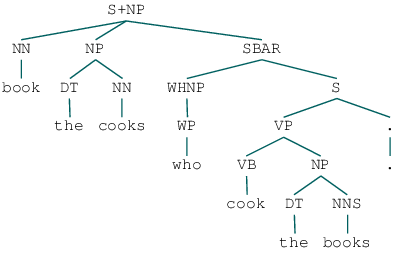

In [2]:
parser.parse("Book the cooks who cook the books.")

# Part 3

See BKL Ch8 Section 86. There is a probabilistic CKY parser (Links to an external site.). Apply it to “Book the cooks who cook the books.” and the longest sentences from Assignment 2. Describe similarity and difference from previous results.  A student has reported that there is something wrong with the code so if you cannot make it work within a reasonable time try to find and use some other statistical parse(s) you can find and if more than one  compare results.

In [4]:
from pcfg import pcfg_parser

parser = pcfg_parser.PCFGParser() # initialize a PCFG parser
parser.train("pcfg/counts_file.sample")
parser.parse(word_tokenize("Book the cooks who cook the books."))


["NP+INTJ+X", "Book"]
["X+DET", "the"]
["NP+INTJ+X", "cooks"]
["NP+INTJ+X", "who"]
["NP+INTJ+X", "cook"]
["X+DET", "the"]
["NOUN", "books"]
[".", "."]


In [5]:
parser.parse(max_sent_toke)

["ADP", "On"]
["NP+DET", "this"]
["ADJ", "subject"]
["NP+PRON", "it"]
["VERB", "might"]
["VERB", "become"]
["NP+PRON", "me"]
["ADJP+ADV", "better"]
["X+PRT", "to"]
["VERB", "be"]
["NP+INTJ+X", "silent"]
["CONJ", "or"]
["X+PRT", "to"]
["NP+INTJ+X", "speak"]
["ADP", "with"]
["NP+INTJ+X", "diffidence"]
[".", ";"]
["CONJ", "but"]
["ADP", "as"]
["NP+NOUN", "something"]
["NP+VERB", "may"]
["VERB", "be"]
["VERB", "expected"]
[".", ","]
["X+DET", "the"]
["NP+INTJ+X", "occasion"]
[".", ","]
["NP+PRON", "I"]
["NP+INTJ+X", "hope"]
[".", ","]
["VERB", "will"]
["VERB", "be"]
["NP+INTJ+X", "admitted"]
["ADP", "as"]
["DET", "an"]
["NP+INTJ+X", "apology"]
["ADP", "if"]
["NP+PRON", "I"]
["NOUN", "venture"]
["X+PRT", "to"]
["NP+INTJ+X", "say"]
["NP+ADP", "that"]
["ADP", "if"]
["X+X", "a"]
["NP+INTJ+X", "preference"]
[".", ","]
["NP+INTJ+X", "upon"]
["NP+INTJ+X", "principle"]
[".", ","]
["ADP", "of"]
["X+X", "a"]
["NP+INTJ+X", "free"]
["NP+INTJ+X", "republican"]
["NOUN", "government"]
[".", ","]
["NP+INT